# 🍷 K-Nearest Neighbors (KNN) Classification – Wine Dataset

## 📌 Objective
Understand and implement the K-Nearest Neighbors algorithm for a classification problem using the **Wine dataset** from scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
display(df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.2f}")

K = 1, Accuracy = 0.96
K = 2, Accuracy = 0.94
K = 3, Accuracy = 0.96
K = 4, Accuracy = 0.96
K = 5, Accuracy = 0.96
K = 6, Accuracy = 0.96
K = 7, Accuracy = 0.96
K = 8, Accuracy = 0.98
K = 9, Accuracy = 0.96
K = 10, Accuracy = 0.96


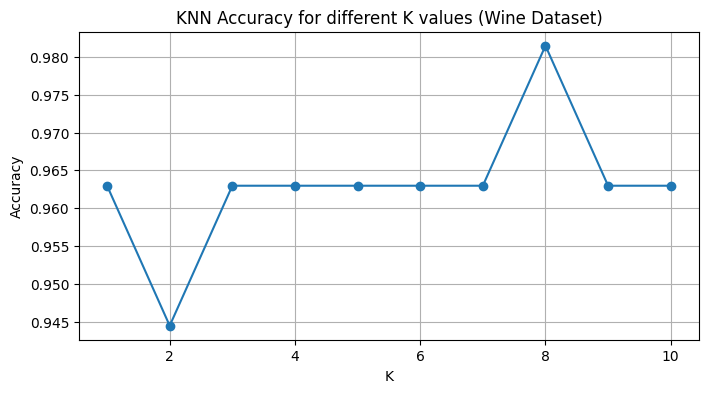

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for different K values (Wine Dataset)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [7]:
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

Best K: 8


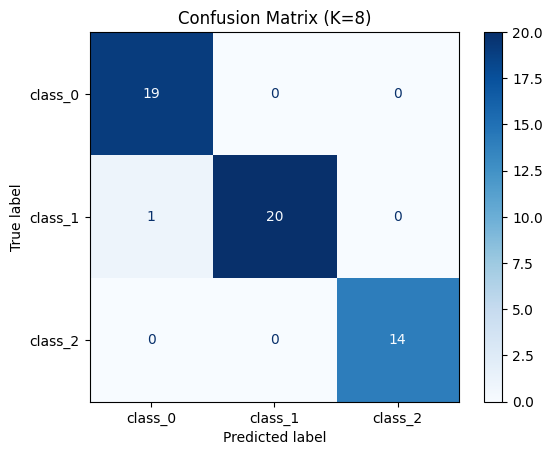

In [8]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()